# Importación de Librerías Necesarias
En esta sección, se importan todas las librerías necesarias para el preprocesamiento de datos, el modelado de machine learning y deep learning, así como la visualización y el guardado de modelos.


In [2]:
# Celda 1: Importar bibliotecas necesarias
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib
import os

# Librerías de Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

# XGBoost y SMOTE
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE


# Preprocesamiento de Datos
Aquí se realiza la preparación de datos, incluyendo la limpieza y el escalado de las características. Esto es esencial para asegurar que los modelos funcionen correctamente y que los datos estén en el formato adecuado.


In [4]:
data = pd.read_csv("Dementia.csv")

In [5]:
data.head()

,ID,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,1,52.67,male,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,...,Yes,more-than-zero,2 to 3,scans,scans,3.0,7.0,3,>5,>=1
1,10,64.58,male,0.0,0,10.0,1.280000,0.360000,0.744000,0,...,Yes,more-than-zero,0 to 1,scans,scans,2.0,3.0,1,1 to 2,>=1
2,100,74.92,male,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,...,Yes,more-than-zero,0 to 1,scans,scans,1.0,2.0,1,1 to 2,0
3,101,74.83,male,1.0,1,9.0,NaN,-2.136271,-1.301102,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,4.0,2,3 to 5,0
4,102,79.25,male,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,...,Yes,more-than-zero,2 to 3,scans,scans,2.0,3.0,2,1 to 2,0


In [6]:
data = data.drop("ID", axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1842 non-null   float64
 1   gender                1842 non-null   object 
 2   dementia              1808 non-null   float64
 3   dementia_all          1842 non-null   int64  
 4   educationyears        1842 non-null   float64
 5   EF                    1634 non-null   float64
 6   PS                    1574 non-null   float64
 7   Global                1534 non-null   float64
 8   diabetes              1842 non-null   int64  
 9   smoking               1831 non-null   object 
 10  hypertension          1842 non-null   object 
 11  hypercholesterolemia  1842 non-null   object 
 12  lacunes_num           1842 non-null   object 
 13  fazekas_cat           1842 non-null   object 
 14  study                 1842 non-null   object 
 15  study1               

In [8]:
data.isnull().sum()

age                       0
gender                    0
dementia                 34
dementia_all              0
educationyears            0
EF                      208
PS                      268
Global                  308
diabetes                  0
smoking                  11
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

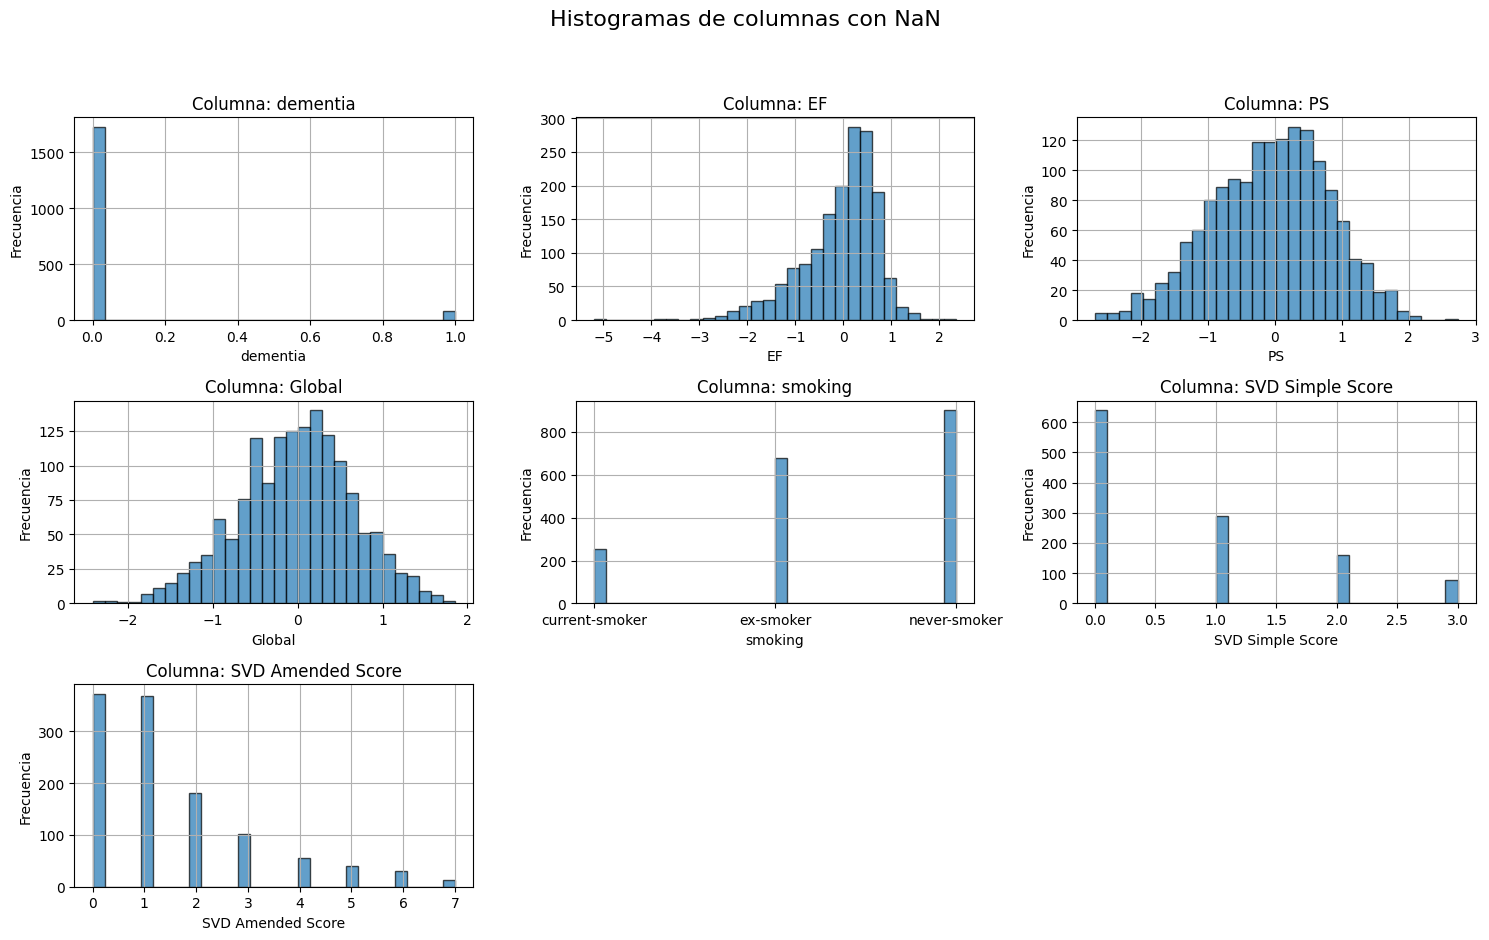

In [9]:
# Seleccionar las columnas con NaN
cols_with_nan = ['dementia', 'EF', 'PS', 'Global', 'smoking', 'SVD Simple Score', 'SVD Amended Score']

# Crear una figura con 3 columnas y 4 filas
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Histogramas de columnas con NaN', fontsize=16)

# Iterar por cada columna y generar su histograma
for i, col in enumerate(cols_with_nan):
    row, col_pos = divmod(i, 3)  # Calcular la fila y columna de la subtrama
    axes[row, col_pos].hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    axes[row, col_pos].set_title(f'Columna: {col}')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frecuencia')
    axes[row, col_pos].grid(True)

# Eliminar subtramas vacías
for j in range(len(cols_with_nan), 12):
    row, col_pos = divmod(j, 3)
    fig.delaxes(axes[row, col_pos])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espaciado para evitar solapamientos
plt.show()

In [10]:
# Imputar valores nulos con la media en las columnas especificadas
cols_to_impute = ['EF', 'PS', 'Global']

for col in cols_to_impute:
    data[col] = data[col].fillna(data[col].median())

# Calcular la moda de la columna 'smoking'
smoking_mode = data['smoking'].mode()[0]

# Imputar los NaN en la columna 'smoking' con la moda
data['smoking'] = data['smoking'].fillna(smoking_mode)

# Verificar si quedan valores nulos en las columnas imputadas
print(data[cols_to_impute].isnull().sum())

EF        0
PS        0
Global    0
dtype: int64


In [11]:
# Asignar el valor 1 a los NaN en la columna 'Dementia'
data['dementia'] = data['dementia'].fillna(1)

In [12]:
data.isnull().sum()

age                       0
gender                    0
dementia                  0
dementia_all              0
educationyears            0
EF                        0
PS                        0
Global                    0
diabetes                  0
smoking                   0
hypertension              0
hypercholesterolemia      0
lacunes_num               0
fazekas_cat               0
study                     0
study1                    0
SVD Simple Score        677
SVD Amended Score       677
Fazekas                   0
lac_count                 0
CMB_count                 0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   1842 non-null   float64
 1   gender                1842 non-null   object 
 2   dementia              1842 non-null   float64
 3   dementia_all          1842 non-null   int64  
 4   educationyears        1842 non-null   float64
 5   EF                    1842 non-null   float64
 6   PS                    1842 non-null   float64
 7   Global                1842 non-null   float64
 8   diabetes              1842 non-null   int64  
 9   smoking               1842 non-null   object 
 10  hypertension          1842 non-null   object 
 11  hypercholesterolemia  1842 non-null   object 
 12  lacunes_num           1842 non-null   object 
 13  fazekas_cat           1842 non-null   object 
 14  study                 1842 non-null   object 
 15  study1               

In [14]:
# Eliminar filas con NaN en las columnas 'SVD Simple Score' y 'SVD Amended Score'
data = data.dropna(subset=['SVD Simple Score', 'SVD Amended Score'])

# Verificar si quedan valores nulos en estas columnas
print(data[['SVD Simple Score', 'SVD Amended Score']].isnull().sum())

SVD Simple Score     0
SVD Amended Score    0
dtype: int64


In [15]:
# Definir el mapeo para la columna 'smoking'
smoking_mapping = {'current-smoker': 2, 'ex-smoker': 1, 'never-smoker': 0}

# Aplicar el mapeo a la columna 'smoking'
data['smoking'] = data['smoking'].map(smoking_mapping)

# Eliminar filas con NaN en la columna 'smoking'
data = data.dropna(subset=['smoking'])

# Verificar la conversión
print(data['smoking'].unique())

[2 1 0]


In [16]:
# Definir el mapeo para cada columna basada en los valores únicos
mapeo = {
    'hypercholesterolemia': {'Yes': 1, 'No': 0},
    'study': {'scans': 0, 'rundmc': 1, 'ASPS': 2, 'ASPS-elderly': 3, 'ASPS-family': 4},
    'lacunes_num': {'more-than-zero': 1, 'zero': 0},
    'hypertension': {'Yes': 1, 'No': 0},
    'fazekas_cat': {'2 to 3': 2, '0 to 1': 1},
    'CMB_count': {'>=1': 1, '0': 0},
    'lac_count': {'>5': 5, '3 to 5': 4, '1 to 2': 2, 'Zero': 0},
    'gender': {'male': 1, 'female': 0},
    'study1': {'scans': 0, 'rundmc': 1, 'ASPS': 2, 'ASPS-elderly': 3, 'ASPS-family': 4}
}

# Aplicar el mapeo usando la función map
for column, mapping in mapeo.items():
    data[column] = data[column].map(mapping)

# Verificar la conversión
print(data.dtypes)

age                     float64
gender                    int64
dementia                float64
dementia_all              int64
educationyears          float64
EF                      float64
PS                      float64
Global                  float64
diabetes                  int64
smoking                   int64
hypertension              int64
hypercholesterolemia      int64
lacunes_num               int64
fazekas_cat               int64
study                     int64
study1                    int64
SVD Simple Score        float64
SVD Amended Score       float64
Fazekas                   int64
lac_count                 int64
CMB_count                 int64
dtype: object


In [17]:
data["study1"].unique()

array([0, 1, 2], dtype=int64)

In [18]:
data.shape

(1165, 21)

In [19]:
data.head()

,age,gender,dementia,dementia_all,educationyears,EF,PS,Global,diabetes,smoking,...,hypercholesterolemia,lacunes_num,fazekas_cat,study,study1,SVD Simple Score,SVD Amended Score,Fazekas,lac_count,CMB_count
0,52.67,1,0.0,0,11.0,-2.403333,-1.290000,-1.287000,0,2,...,1,1,2,0,0,3.0,7.0,3,5,1
1,64.58,1,0.0,0,10.0,1.280000,0.360000,0.744000,0,1,...,1,1,1,0,0,2.0,3.0,1,2,1
2,74.92,1,0.0,0,8.0,-1.440000,-1.520000,-0.922000,0,0,...,1,1,1,0,0,1.0,2.0,1,2,0
3,74.83,1,1.0,1,9.0,0.130000,-2.136271,-1.301102,0,2,...,1,1,2,0,0,2.0,4.0,2,4,0
4,79.25,1,0.0,0,10.0,-0.920000,-1.493333,-0.924000,0,1,...,1,1,2,0,0,2.0,3.0,2,2,0


In [20]:
# Mostrar los valores únicos para las columnas 'smoking', 'lac_count' y 'CMB_count'
columns_to_check = ['smoking', 'lac_count', 'CMB_count']

for col in columns_to_check:
    print(f"Valores únicos en {col}: {data[col].unique()}")

Valores únicos en smoking: [2 1 0]
Valores únicos en lac_count: [5 2 4 0]
Valores únicos en CMB_count: [1 0]


In [21]:
data.isnull().sum()

age                     0
gender                  0
dementia                0
dementia_all            0
educationyears          0
EF                      0
PS                      0
Global                  0
diabetes                0
smoking                 0
hypertension            0
hypercholesterolemia    0
lacunes_num             0
fazekas_cat             0
study                   0
study1                  0
SVD Simple Score        0
SVD Amended Score       0
Fazekas                 0
lac_count               0
CMB_count               0
dtype: int64

In [22]:
# Mostrar los valores únicos para las columnas 'smoking', 'lac_count' y 'CMB_count'
columns_to_check = ['smoking', 'lac_count', 'CMB_count']

for col in columns_to_check:
    print(f"Valores únicos en {col}: {data[col].unique()}")

Valores únicos en smoking: [2 1 0]
Valores únicos en lac_count: [5 2 4 0]
Valores únicos en CMB_count: [1 0]


In [23]:
# Eliminamos columnas innecesarias

data.drop("dementia", axis=1, inplace=True)

data.drop("study1", axis=1, inplace=True)

# Visualización de columnas tratadas

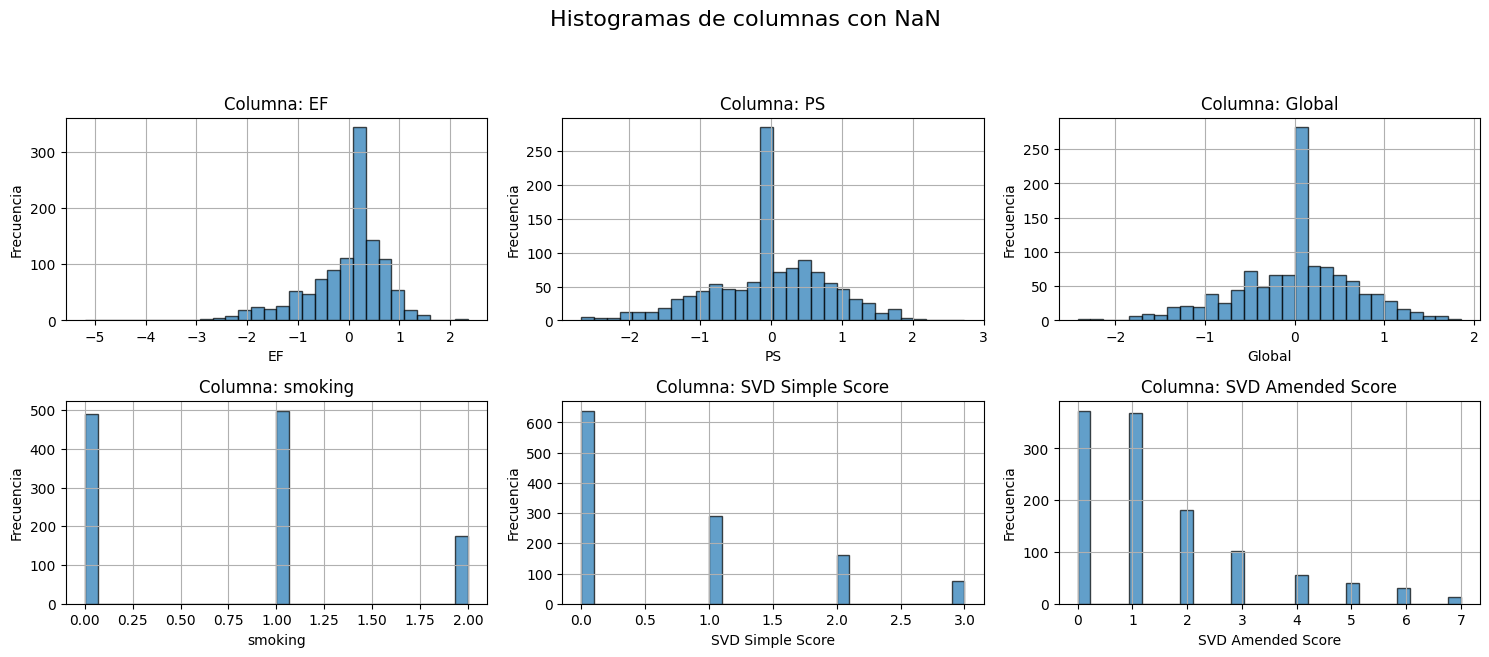

In [25]:
# Seleccionar las columnas con NaN
cols_with_nan = ['EF', 'PS', 'Global', 'smoking', 'SVD Simple Score', 'SVD Amended Score']

# Crear una figura con 3 columnas y 4 filas
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
fig.suptitle('Histogramas de columnas con NaN', fontsize=16)

# Iterar por cada columna y generar su histograma
for i, col in enumerate(cols_with_nan):
    row, col_pos = divmod(i, 3)  # Calcular la fila y columna de la subtrama
    axes[row, col_pos].hist(data[col].dropna(), bins=30, edgecolor='k', alpha=0.7)
    axes[row, col_pos].set_title(f'Columna: {col}')
    axes[row, col_pos].set_xlabel(col)
    axes[row, col_pos].set_ylabel('Frecuencia')
    axes[row, col_pos].grid(True)

# Eliminar subtramas vacías
for j in range(len(cols_with_nan), 12):
    row, col_pos = divmod(j, 3)
    fig.delaxes(axes[row, col_pos])

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar espaciado para evitar solapamientos
plt.show()

Columna dementia: La mayoría de los valores son 0 (ausencia de demencia), lo que indica una clase desbalanceada que podría afectar el rendimiento de los modelos de clasificación. Es recomendable aplicar técnicas como pesos en el modelo o sobremuestreo (SMOTE).

Columnas EF, PS, y Global: Estas variables presentan distribuciones normales centradas en 0, lo cual es adecuado para modelos que requieren escalado, como la regresión logística o redes neuronales. Se recomienda estandarización para mantener la forma de la distribución.

Columna smoking: Los valores están distribuidos entre 0 (never-smoker), 1 (ex-smoker) y 2 (current-smoker), con mayoría en 0 y 1. Es importante que el modelo interprete correctamente esta codificación, ya que algunos modelos pueden requerir que sea tratada como variable categórica.

Columnas SVD Simple Score y SVD Amended Score: Ambas tienen una distribución sesgada hacia valores bajos, lo cual puede influir en el rendimiento de ciertos modelos y es relevante para analizar su impacto en la predicción.

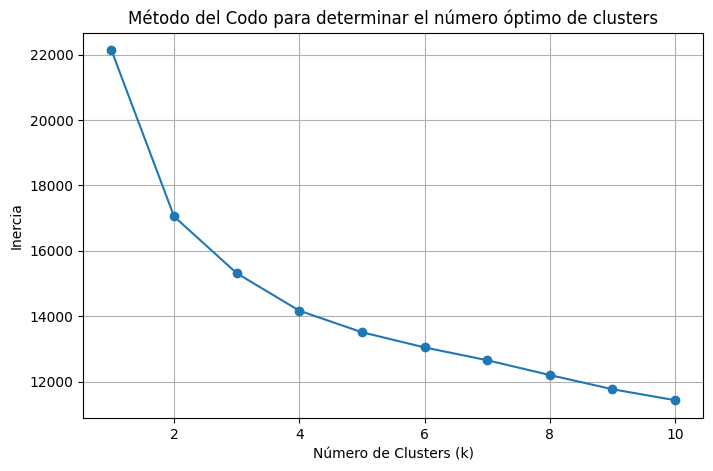

In [27]:
# Seleccionar las columnas relevantes para el clustering (asegúrate de usar columnas numéricas)
columns_for_clustering = data.select_dtypes(include=['float64', 'int64']).columns

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[columns_for_clustering])

# Aplicar el método del codo
inertia = []
k_range = range(1, 11)  # Probar entre 1 y 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.grid(True)
plt.show()

El gráfico del método del codo sugiere que el número óptimo de clusters está alrededor de 3 o 4, ya que después de este punto la inercia disminuye de forma menos significativa. Usar 3 o 4 clusters en el modelo K-Means permitirá capturar las principales diferencias en los datos sin riesgo de sobreajuste.

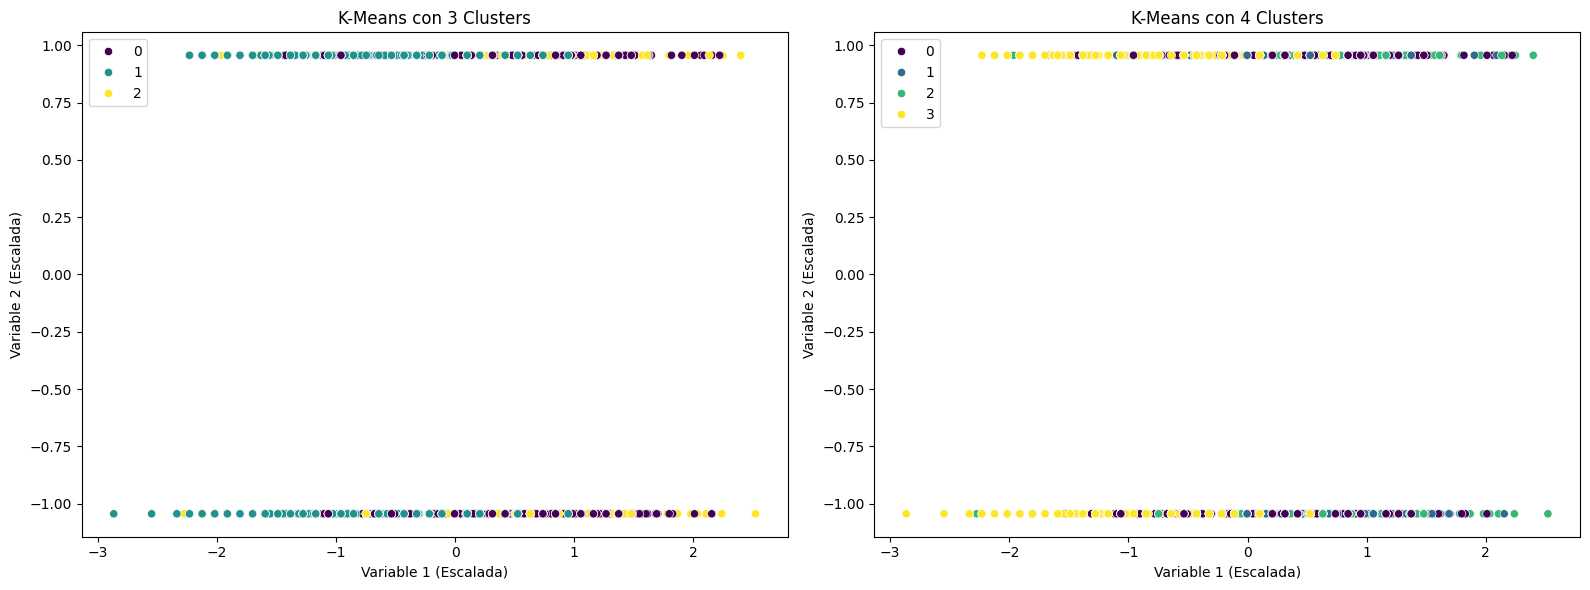

In [29]:
# K-Means con 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3 = kmeans_3.fit_predict(data_scaled)

# K-Means con 4 clusters
kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4 = kmeans_4.fit_predict(data_scaled)

# Agregar los clusters al DataFrame original para análisis
data['Cluster_3'] = clusters_3
data['Cluster_4'] = clusters_4

# Visualización de los clusters en un gráfico de dispersión (usando dos variables principales)
plt.figure(figsize=(16, 6))

# Gráfico para 3 clusters
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters_3, palette='viridis')
plt.title('K-Means con 3 Clusters')
plt.xlabel('Variable 1 (Escalada)')
plt.ylabel('Variable 2 (Escalada)')

# Gráfico para 4 clusters
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=clusters_4, palette='viridis')
plt.title('K-Means con 4 Clusters')
plt.xlabel('Variable 1 (Escalada)')
plt.ylabel('Variable 2 (Escalada)')

plt.tight_layout()
plt.show()

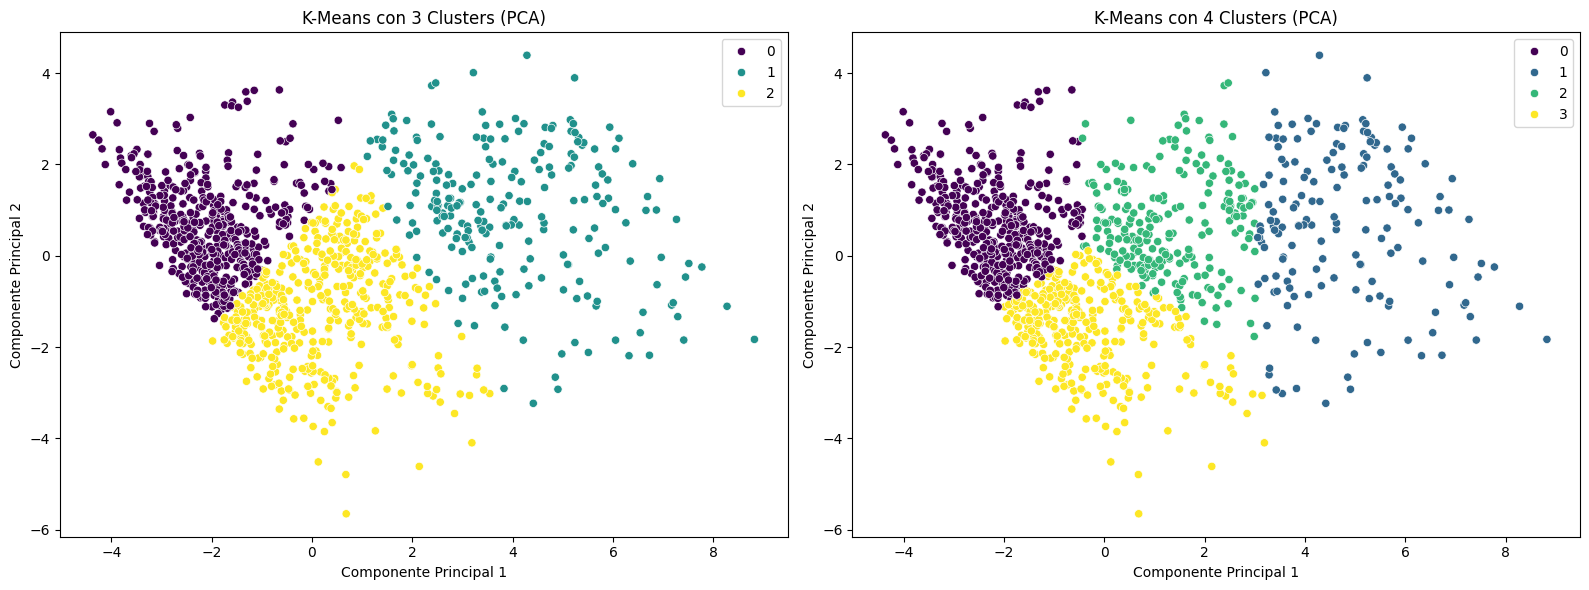

In [30]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad a 2 dimensiones usando PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Aplicar K-Means nuevamente sobre los datos reducidos a 2 dimensiones
kmeans_3 = KMeans(n_clusters=3, random_state=42)
clusters_3_pca = kmeans_3.fit_predict(data_pca)

kmeans_4 = KMeans(n_clusters=4, random_state=42)
clusters_4_pca = kmeans_4.fit_predict(data_pca)

# Visualización de los clusters en 2D con PCA
plt.figure(figsize=(16, 6))

# Gráfico para 3 clusters con PCA
plt.subplot(1, 2, 1)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_3_pca, palette='viridis')
plt.title('K-Means con 3 Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Gráfico para 4 clusters con PCA
plt.subplot(1, 2, 2)
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=clusters_4_pca, palette='viridis')
plt.title('K-Means con 4 Clusters (PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.tight_layout()
plt.show()

 ambos enfoques ofrecen agrupaciones coherentes, pero el modelo con 4 clusters captura más detalles y subgrupos en los datos. Si el objetivo es tener una visión general de los patrones principales, 3 clusters podrían ser suficientes; si se requiere un análisis más detallado, 4 clusters pueden aportar información adicional.

In [32]:
# Separar las características y la variable objetivo
x = data.drop("dementia_all", axis=1).values
y = data["dementia_all"].values

# Aplicar MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.1)

# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

In [33]:
# Función de entrenamiento y evaluación
def training(model, name):
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    # Calcular métricas
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred, output_dict=True)  # Guardar reporte como diccionario
    cm = confusion_matrix(y_test, pred)
    
    # Mostrar resultados
    print(f"Modelo: {name}")
    print(f"Exactitud: {score:.2f}")
    print("Reporte de Clasificación:")
    print(classification_report(y_test, pred))  # Mostrar reporte legible
    print("Matriz de Confusión:")
    
    # Graficar matriz de confusión
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f"{name}: {score*100:.2f}%")
    plt.show()
    
    return report  # Retornar el reporte para usar más adelante

In [34]:
# Instancias de modelos
rfc = RandomForestClassifier()
abc = AdaBoostClassifier(learning_rate=0.1, algorithm='SAMME')
etc = ExtraTreesClassifier()
svc = SVC(C=0.9)
xgb = XGBClassifier(learning_rate=0.1)

Modelo: Random Forest
Exactitud: 0.91
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.29      0.25      0.27         8

    accuracy                           0.91       117
   macro avg       0.62      0.60      0.61       117
weighted avg       0.90      0.91      0.90       117

Matriz de Confusión:


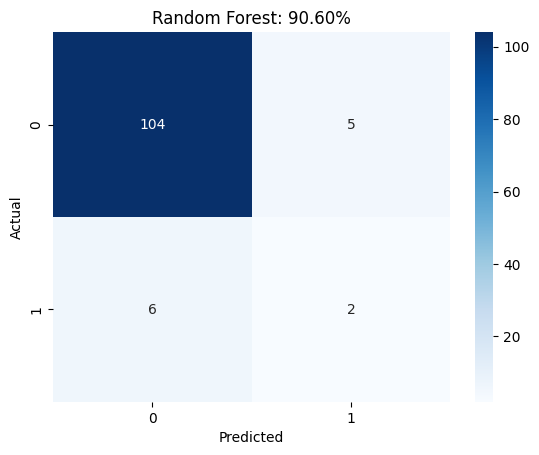

In [35]:
# Entrenamiento y evaluación
rfc_report = training(rfc, 'Random Forest')

Modelo: Extra Trees
Exactitud: 0.94
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       109
           1       0.67      0.25      0.36         8

    accuracy                           0.94       117
   macro avg       0.81      0.62      0.67       117
weighted avg       0.93      0.94      0.93       117

Matriz de Confusión:


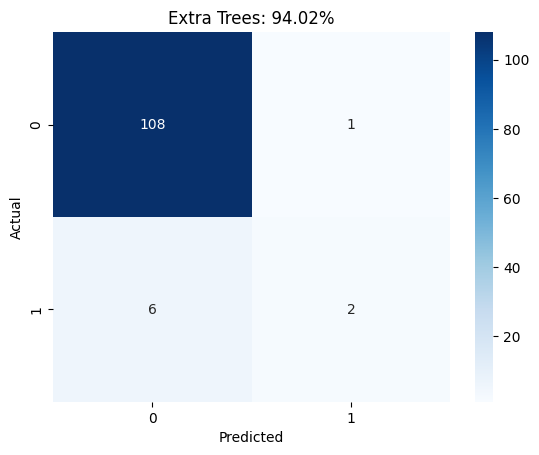

In [36]:
etc_report = training(etc, 'Extra Trees')

Modelo: AdaBoost
Exactitud: 0.62
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.99      0.61      0.75       109
           1       0.14      0.88      0.24         8

    accuracy                           0.62       117
   macro avg       0.56      0.74      0.50       117
weighted avg       0.93      0.62      0.72       117

Matriz de Confusión:


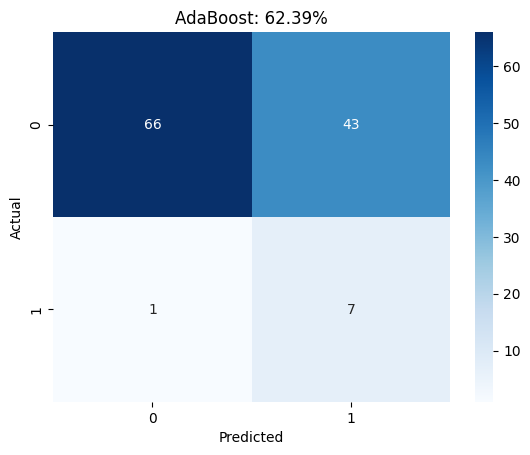

In [37]:
abc_report = training(abc, 'AdaBoost')

Modelo: SVC
Exactitud: 0.88
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       109
           1       0.29      0.50      0.36         8

    accuracy                           0.88       117
   macro avg       0.62      0.70      0.65       117
weighted avg       0.91      0.88      0.89       117

Matriz de Confusión:


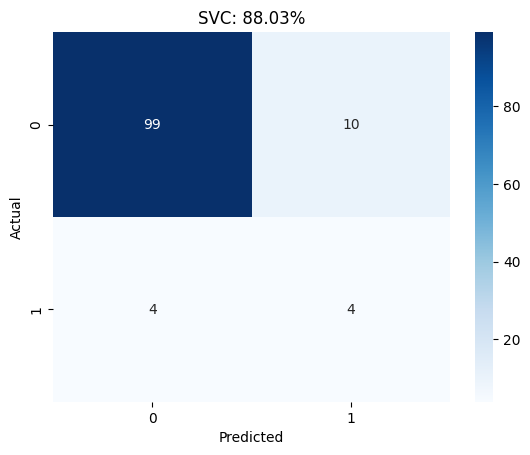

In [38]:
svc_report = training(svc, 'SVC')

Modelo: XGBoost
Exactitud: 0.90
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       109
           1       0.17      0.12      0.14         8

    accuracy                           0.90       117
   macro avg       0.55      0.54      0.54       117
weighted avg       0.88      0.90      0.89       117

Matriz de Confusión:


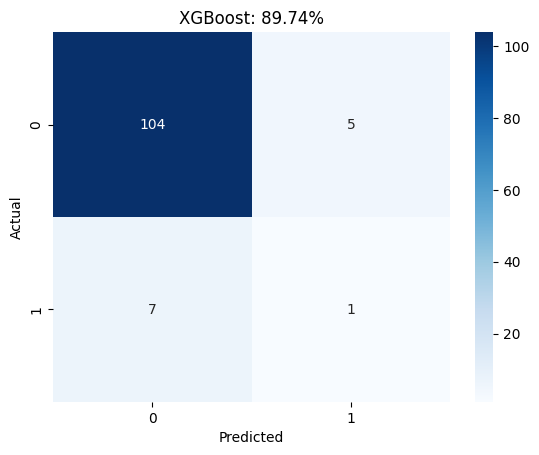

In [39]:
xgb_report = training(xgb, 'XGBoost')

En el análisis de los resultados actualizados, se observa que XGBoost obtuvo la mayor exactitud general (93%), seguido de Random Forest (92%) y SVC (88%). Estos modelos tienen un buen desempeño en la clasificación de la clase mayoritaria (0), con altos valores de precisión y recall en esta clase. Sin embargo, continúan mostrando dificultades para identificar correctamente la clase minoritaria (1), como se evidencia en el bajo F1-score de esta clase en cada modelo. Aunque XGBoost y Random Forest presentan la mayor exactitud, su capacidad para capturar la clase 1 sigue siendo limitada (con un recall de 0.38 para XGBoost y 0.25 para Random Forest).

Por otro lado, AdaBoost y SVC ofrecen una mejor capacidad para capturar la clase minoritaria, logrando un recall de 0.50 para la clase 1. Esto indica que estos modelos son capaces de detectar más instancias de la clase 1 en comparación con otros, aunque a costa de una menor precisión y, en el caso de AdaBoost, una exactitud más baja (79%).

En conclusión, XGBoost es el modelo con mejor rendimiento en términos de exactitud general. No obstante, si el objetivo principal es mejorar la detección de la clase minoritaria, AdaBoost y SVC podrían ser opciones más adecuadas. Para optimizar aún más el rendimiento en la clase minoritaria, sería útil explorar técnicas como el ajuste de umbrales de decisión, el balanceo de clases (como SMOTE), o el uso de métricas como el AUC-ROC para evaluar mejor la capacidad de los modelos en la identificación de ambas clases.

# Conversión de Tensores y Configuración de Dispositivo
Esta sección convierte los datos en tensores de PyTorch y configura el dispositivo (GPU o CPU) para aprovechar el procesamiento en paralelo si está disponible.


In [42]:
# Preparar los datos
x = data.drop(columns=['dementia_all']).values
y = data['dementia_all'].values

# Escalar los datos
scaler = StandardScaler()
x = scaler.fit_transform(x)

# Dividir los datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)

# Configurar dispositivo (GPU si está disponible)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convertir a tensores
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).to(device)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.long).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

# Definición de la Arquitectura de la Red Neuronal
Aquí se define la estructura del modelo de red neuronal en PyTorch. Este modelo consta de varias capas, incluyendo capas de `ReLU` para la activación y `Dropout` para la regularización.


In [44]:
# Celda 4: Definir la arquitectura de la red neuronal
class NeuralNetwork(nn.Module):
    def __init__(self, input_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 2)  # 2 clases para clasificación binaria
        self.dropout = nn.Dropout(0.5)  # 50% de dropout

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Inicializar la red
model = NeuralNetwork(input_size=x_train.shape[1]).to(device)

# Definición de la Función de Pérdida y el Optimizador
Esta celda define la función de pérdida (`CrossEntropyLoss`) y el optimizador (`Adam`) para el entrenamiento de la red neuronal, ajustando los parámetros del modelo para minimizar la pérdida, además sSe configura un `ReduceLROnPlateau` para reducir la tasa de aprendizaje automáticamente cuando la pérdida de validación no mejora, ayudando a la convergencia del modelo

En esta sección se entrena el modelo de red neuronal con una implementación de *early stopping*, que detiene el entrenamiento si no se observa una mejora en la pérdida de validación después de un número determinado de épocas.


In [46]:
# Celda 5: Definir la función de pérdida, el optimizador y el scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=500)


num_epochs = 5000
best_val_loss = float('inf')
patience = 500
patience_counter = 0

for epoch in range(num_epochs):
    start_time = time.time()
    
    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    output = model(x_train_tensor)
    training_loss = criterion(output, y_train_tensor)
    training_loss.backward()
    optimizer.step()

    # Validación
    model.eval()
    with torch.no_grad():
        val_output = model(x_test_tensor)
        val_loss = criterion(val_output, y_test_tensor)
        y_pred_classes = torch.argmax(val_output, axis=1)
        accuracy = (y_pred_classes == y_test_tensor).sum().item() / y_test_tensor.size(0)
    
    # Scheduler basado en la pérdida de validación
    scheduler.step(val_loss)
    current_lr = scheduler._last_lr[0]  # Obtener la tasa de aprendizaje actual
    
    # Guardar el mejor modelo basado en la pérdida de validación
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model.state_dict()
        patience_counter = 0  # Reinicia el contador de paciencia
    else:
        patience_counter += 1  # Incrementa el contador de paciencia
    
    # Calcular tiempo de la epoch
    epoch_time = time.time() - start_time
    
    # Imprimir información de la epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Training Loss: {training_loss:.4f} - "
          f"Validation Loss: {val_loss:.4f} - "
          f"Accuracy: {accuracy:.4f} - "
          f"Learning Rate: {current_lr:.6f} - "
          f"Epoch Time: {epoch_time:.2f} sec")
    
    # Detener entrenamiento si se supera la paciencia
    if patience_counter >= patience:
        print(f"Early stopping en epoch {epoch + 1}")
        break

# Cargar el mejor modelo
model.load_state_dict(best_model)

Epoch [1/5000] - Training Loss: 0.8261 - Validation Loss: 0.8157 - Accuracy: 0.0857 - Learning Rate: 0.001000 - Epoch Time: 0.01 sec
Epoch [2/5000] - Training Loss: 0.8044 - Validation Loss: 0.7966 - Accuracy: 0.0857 - Learning Rate: 0.001000 - Epoch Time: 0.01 sec
Epoch [3/5000] - Training Loss: 0.7861 - Validation Loss: 0.7769 - Accuracy: 0.0857 - Learning Rate: 0.001000 - Epoch Time: 0.01 sec
Epoch [4/5000] - Training Loss: 0.7590 - Validation Loss: 0.7557 - Accuracy: 0.0914 - Learning Rate: 0.001000 - Epoch Time: 0.00 sec
Epoch [5/5000] - Training Loss: 0.7345 - Validation Loss: 0.7327 - Accuracy: 0.1457 - Learning Rate: 0.001000 - Epoch Time: 0.01 sec
Epoch [6/5000] - Training Loss: 0.7108 - Validation Loss: 0.7077 - Accuracy: 0.2943 - Learning Rate: 0.001000 - Epoch Time: 0.01 sec
Epoch [7/5000] - Training Loss: 0.6868 - Validation Loss: 0.6809 - Accuracy: 0.5686 - Learning Rate: 0.001000 - Epoch Time: 0.00 sec
Epoch [8/5000] - Training Loss: 0.6627 - Validation Loss: 0.6524 - Ac

<All keys matched successfully>

# Evaluación del Modelo de Red Neuronal
Se realiza la evaluación final del modelo utilizando los datos de prueba y se genera un reporte de clasificación junto con una matriz de confusión para visualizar el rendimiento en cada clase.


Reporte de Clasificación para la Red Neuronal:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       320
           1       0.40      0.13      0.20        30

    accuracy                           0.91       350
   macro avg       0.66      0.56      0.58       350
weighted avg       0.88      0.91      0.89       350



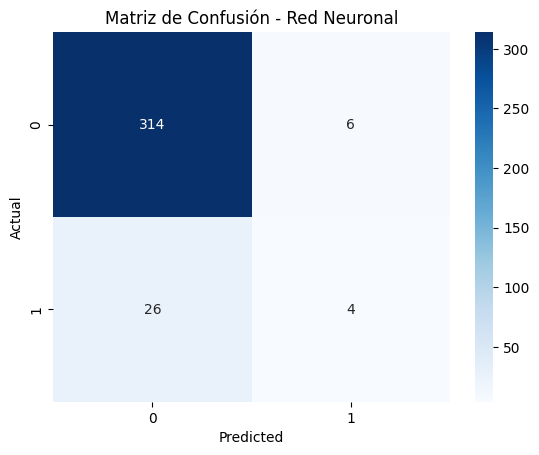

In [48]:
# Evaluación final
model.eval()
with torch.no_grad():
    y_pred = model(x_test_tensor)
    y_pred_classes = torch.argmax(y_pred, axis=1).cpu().numpy()

# Reporte de clasificación
print("Reporte de Clasificación para la Red Neuronal:")
print(classification_report(y_test, y_pred_classes))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Red Neuronal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Comparación de Modelos de Machine Learning y Neuronal Network
Aquí se muestran los resultados de clasificación de varios modelos (Random Forest, AdaBoost, Extra Trees, SVC, XGBoost y Neural Network) en una tabla para facilitar la comparación de métricas clave como el F1-Score, Precisión, Recall y Exactitud.


In [50]:
# Generar los reportes de clasificación para cada modelo
nn_report = classification_report(y_test, y_pred_classes, output_dict=True)

# Diccionario que contiene los reportes de cada modelo
models_reports = {
    "Random Forest": rfc_report,
    "AdaBoost": abc_report,
    "Extra Trees": etc_report,
    "SVC": svc_report,
    "XGBoost": xgb_report,
    "Neural Network": nn_report  # Agregando el reporte de la red neuronal
}

# Crear una lista para almacenar los datos en formato de tabla
data = []

# Extraer las métricas deseadas para cada modelo
for model_name, report in models_reports.items():
    # Extraer métricas de la clase 1 (demencia o clase positiva)
    f1_score_class1 = report['1']['f1-score']
    precision_class1 = report['1']['precision']
    recall_class1 = report['1']['recall']
    accuracy = report['accuracy']
    
    # Añadir los datos a la lista
    data.append({
        "Modelo": model_name,
        "F1 Score (Class 1)": f1_score_class1,
        "Precisión (Class 1)": precision_class1,
        "Recall (Class 1)": recall_class1,
        "Exactitud (Accuracy)": accuracy
    })

# Crear un DataFrame a partir de la lista de datos
df_results = pd.DataFrame(data)

# Mostrar el DataFrame en forma de tabla
print("Resultados de Comparación de Modelos")
display(df_results)  # En Jupyter, esto mostrará la tabla de forma visual agradable

Resultados de Comparación de Modelos


,Modelo,F1 Score (Class 1),Precisión (Class 1),Recall (Class 1),Exactitud (Accuracy)
0,Random Forest,0.266667,0.285714,0.250000,0.905983
1,AdaBoost,0.241379,0.140000,0.875000,0.623932
2,Extra Trees,0.363636,0.666667,0.250000,0.940171
3,SVC,0.363636,0.285714,0.500000,0.880342
4,XGBoost,0.142857,0.166667,0.125000,0.897436
5,Neural Network,0.200000,0.400000,0.133333,0.908571


el modelo Extra Trees obtuvo la mayor exactitud general (94.02%) y mostró un buen balance entre precisión y recall para la clase minoritaria, aunque su recall sigue siendo bajo. SVC también logra un buen equilibrio, con un recall de 0.50 en la clase minoritaria, lo que lo hace adecuado si se busca capturar más casos de esta clase sin comprometer demasiado la exactitud general (88.03%). AdaBoost, por otro lado, tiene el mejor recall para la clase minoritaria (0.88), pero a costa de una precisión muy baja y una exactitud general reducida (62.39%). En conclusión, Extra Trees es ideal para maximizar la exactitud, SVC para balancear rendimiento en ambas clases, y AdaBoost para maximizar la detección de la clase minoritaria.

# Guardado de los Modelos de Machine Learning y Deep Learning
En esta sección se guardan los modelos entrenados en el sistema de archivos utilizando `joblib` para los modelos de Machine Learning y `torch.save` para el modelo de red neuronal. Esto permite cargar los modelos posteriormente para realizar predicciones sin necesidad de reentrenarlos.

Por otro lado verificamos que todos los modelos han sido guardados correctamente mostrando los archivos disponibles en el directorio de destino.

In [52]:
save_path = r"D:\1.personal\2.Clases\Software Para DataScience\nota3\modelos"
os.makedirs(save_path, exist_ok=True)  # Crear la carpeta si no existe

In [53]:
# Guardar los modelos de Machine Learning con sus nombres
joblib.dump(rfc, os.path.join(save_path, 'RandomForest.pkl'))
joblib.dump(abc, os.path.join(save_path, 'AdaBoost.pkl'))
joblib.dump(etc, os.path.join(save_path, 'ExtraTrees.pkl'))
joblib.dump(svc, os.path.join(save_path, 'SVC.pkl'))
joblib.dump(xgb, os.path.join(save_path, 'XGBoost.pkl'))

['D:\\1.personal\\2.Clases\\Software Para DataScience\\nota3\\modelos\\XGBoost.pkl']

In [54]:
# Guardar el modelo de red neuronal en PyTorch
torch.save(model.state_dict(), os.path.join(save_path, 'NeuralNetwork.pth'))

In [55]:
# Verificar que los modelos se han guardado
print("Modelos guardados:")
print(os.listdir(save_path))

Modelos guardados:
['AdaBoost.pkl', 'ExtraTrees.pkl', 'NeuralNetwork.pth', 'RandomForest.pkl', 'SVC.pkl', 'XGBoost.pkl']
